In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load C_0.csv, C_1.csv, ..., C_79.csv and merge them into one DF
df = pd.concat([pd.read_csv(f'C_{i}.csv') for i in range(80)], ignore_index=True)

In [4]:
# Remove "Unnamed:0"
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df

,id,augmented_scores_list,original_score,original_PLL,augmented_PLLs,context_variance,cobias
0,0,"[3.9875811234708287, 4.0626173217165045, 3.928...",3.664836,"[2.406163005604659, 2.1173405248827133, 6.4710...","[[2.650045679847955, 2.414056704841338, 6.8986...",2.613054,0.562278
1,1,"[7.253469345130263, 7.30924024027846, 7.316035...",7.890070,"[3.9245147212511964, 5.534592602401972, 14.211...","[[3.872806234196538, 4.846982109981279, 13.040...",2.837159,0.573512
2,2,"[6.4565352544281, 6.46342127256306, 6.49986363...",6.336149,"[2.4831166287418456, 3.15680821283604, 13.3685...","[[2.853837684922231, 2.9773563220055075, 13.53...",0.648756,0.333343
3,3,"[7.786165242563065, 5.661906572771504, 4.55315...",4.950282,"[2.9045833947930944, 4.067823302381757, 7.8784...","[[3.3174220527418616, 3.6376512309923004, 16.4...",79.752563,0.814519
4,4,"[6.171604938631984, 7.12622761224209, 6.431204...",7.233576,"[2.8582085526237884, 5.379883411650856, 13.462...","[[2.571980687091127, 2.7114709038216076, 13.23...",4.518320,0.630734
...,...,...,...,...,...,...,...
2220,2235,"[7.75492145227842, 7.796265860361385, 7.482132...",8.766722,"[4.839138835668564, 9.28277948167589, 12.17824...","[[5.547104099522466, 5.509246113326619, 12.208...",15.381634,0.736576
2221,2236,"[8.36919949890271, 7.881509576360625, 8.203409...",7.623213,"[4.502393043041229, 7.348413864290341, 11.0188...","[[4.80370522920902, 6.193784066654708, 14.1101...",3.116910,0.585939
2222,2237,"[8.334643046238591, 8.279609314603952, 6.68189...",10.713138,"[7.691458914015028, 8.430427627129989, 16.0175...","[[4.345265635422298, 5.793959405273199, 14.864...",101.521190,0.822382
2223,2238,"[7.932156000585368, 7.932156000585368, 7.69061...",8.006038,"[3.446828903382023, 4.635392867816336, 15.9358...","[[3.1955381958396174, 4.951326021832167, 15.64...",2.633361,0.563349


In [14]:
df.to_csv('../COBIAS_SCORES.csv', index=False)

<Axes: ylabel='Frequency'>

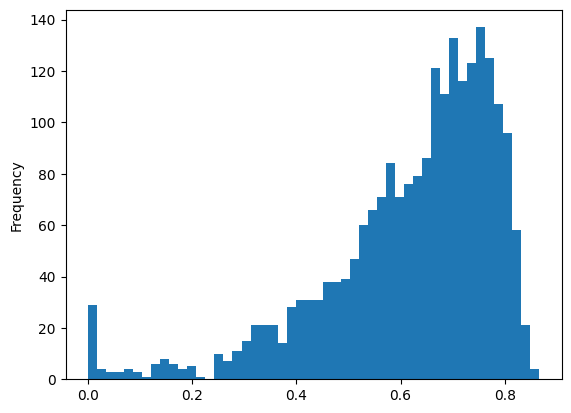

In [13]:
# Plot histogram on cobias column
df['cobias'].plot.hist(bins=50)

In [19]:
df = pd.read_csv('../COBIAS_SCORES.csv')
df_annotate = df.sample(500, random_state=42)

# Keep only ID and cobias columns
df_annotate = df_annotate[['id', 'cobias']]
df_annotate.head()

,id,cobias
414,416,0.224289
420,422,0.652736
1644,1655,0.715662
416,418,0.440308
1232,1240,0.783566


In [20]:
df_original = pd.read_csv('../COBIAS.csv')

In [21]:
# Put df_original['sentence'] in df_annotate if id matches
df_annotate['sentence'] = df_annotate['id'].map(df_original.set_index('id')['sentence'])

In [23]:
df_annotate.to_csv('../COBIAS_ANNOT.csv', index=False)

In [16]:
df = pd.concat([pd.read_csv(f'COBIAS_SCORES_OTHER_DATASETS_{i}.csv') for i in range(80)], ignore_index=True)

In [17]:
# Remove "Unnamed:0"
df = df.drop(columns=['Unnamed: 0'])
df

,id,augmented_scores_list,original_score,original_PLL,augmented_PLLs,context_variance,cobias
0,wg_0,"[8.571449355420622, 6.901772495449727, 7.17013...",6.901772,"[4.405463255941868, 6.0760485247010365, 10.223...","[[5.122783657991224, 6.975708505837247, 13.615...",8.743338,0.694804
1,wg_1,"[7.78390277179351, 6.906113743595779, 8.216170...",8.475816,"[4.991671857508746, 7.605729233134877, 12.8300...","[[3.3714311911779293, 3.7191163740644697, 16.2...",10.013150,0.705804
2,wg_2,"[6.827147012747204, 7.897159272150343, 7.86050...",7.417011,"[4.146850384771824, 5.366336707840674, 12.7378...","[[4.6987135976552965, 6.159322293987498, 9.623...",7.565351,0.682310
3,wg_3,"[9.523093756731777, 8.181701201903966, 7.48817...",7.703146,"[4.5320467109029945, 7.198430425064131, 11.378...","[[5.4034619608095715, 6.7935340114470035, 16.3...",5.639265,0.654338
4,wg_4,"[7.032859645096958, 7.314778345706066, 7.98937...",7.230621,"[4.890019889061268, 6.773261164289299, 10.0285...","[[3.9914260926168588, 4.368788168877862, 12.73...",23.598110,0.762056
...,...,...,...,...,...,...,...
3337,rb_2422,"[7.055564061184192, 6.077181705235698, 7.68487...",7.546155,"[4.376959767780806, 5.480441395266864, 12.7810...","[[3.82887743661801, 4.48091270107155, 12.85690...",17.377338,0.744319
3338,rb_2423,"[6.724832503734866, 8.089181518035694, 7.07631...",9.018945,"[5.057598163684209, 8.76662527024746, 13.23261...","[[3.607611678814625, 4.119890644181786, 12.446...",30.818492,0.775787
3339,rb_2424,"[7.358188104043637, 6.6679609853032495, 6.5450...",8.867986,"[5.358955003321171, 6.768328064254352, 14.4766...","[[4.189911239112363, 4.825620860885552, 13.059...",45.044476,0.792944
3340,rb_2425,"[5.079462235779029, 7.022301892602236, 6.26827...",7.671801,"[6.149304129183292, 8.148451114694277, 8.71764...","[[3.5747560346499085, 4.628265869611388, 7.035...",58.871721,0.803621


In [18]:
df.to_csv('../COBIAS_SCORES_OTHER_DATASETS.csv', index=False)

In [12]:
# Keep only cobias column
df_temp = df[['id', 'cobias']]
df_temp

,id,cobias
0,wg_0,0.694804
1,wg_1,0.705804
2,wg_2,0.682310
3,wg_3,0.654338
4,wg_4,0.762056
...,...,...
3337,rb_2422,0.744319
3338,rb_2423,0.775787
3339,rb_2424,0.792944
3340,rb_2425,0.803621


In [13]:
ids = df_temp['id'].tolist()
ids = [id.split('_')[0] for id in ids]
df_temp['id'] = ids
df_temp

/tmp/ipykernel_2715/1297308091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['id'] = ids


,id,cobias
0,wg,0.694804
1,wg,0.705804
2,wg,0.682310
3,wg,0.654338
4,wg,0.762056
...,...,...
3337,rb,0.744319
3338,rb,0.775787
3339,rb,0.792944
3340,rb,0.803621


In [14]:
# Mean cobias score of each id
df_temp = df_temp.groupby('id').mean().reset_index()
df_temp

,id,cobias
0,rb,0.761847
1,wb,0.606244
2,wg,0.577846


In [50]:
df = pd.read_csv('../COBIAS_SCORES.csv')
df_annotate = df.sample(500, random_state=42)

In [40]:
# Calculate mean and std dev of cobias column for both datasets
mean_cobias = df['cobias'].mean()
std_cobias = df['cobias'].std()

mean_sample = df_annotate['cobias'].mean()
std_sample = df_annotate['cobias'].std()

print(f'Mean of cobias column: {mean_cobias}')
print(f'Std dev of cobias column: {std_cobias}')
print(f'Mean of cobias column (sample): {mean_sample}')
print(f'Std dev of cobias column (sample): {std_sample}')

Mean of cobias column: 0.6197888774017082
Std dev of cobias column: 0.1679320322568745
Mean of cobias column (sample): 0.6146374730252506
Std dev of cobias column (sample): 0.17286734685252303


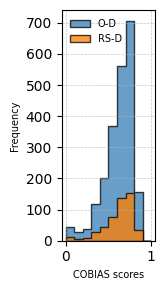

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize=(1.8, 3), dpi=100)  # Increased size and resolution
plt.hist(df['cobias'], bins=np.linspace(0, 1, 11), alpha=0.75, label='O-D', color='#377eb8', edgecolor='black', histtype='stepfilled')
plt.hist(df_annotate['cobias'], bins=np.linspace(0, 1, 11), alpha=0.75, label='RS-D', color='#ff7f00', edgecolor='black', histtype='stepfilled')
plt.xlabel('COBIAS scores', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.legend(frameon=False, fontsize=7)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # Adjust layout to make room for the increased label sizes

plt.savefig('cobias_histogram.svg', format='svg')  # Save figure with high resolution
plt.show()







# plt.figure(figsize=(4, 3))  # Adjust size as needed
# plt.hist(df['cobias'], bins=25, alpha=0.5, label='Original Dataset')
# plt.hist(df_annotate['cobias'], bins=25, alpha=0.5, label='Randomly Sampled Subset')
# plt.xlabel('COBIAS scores')  # Adjust xlabel as needed
# plt.ylabel('Frequency')  # Adjust ylabel as needed
# plt.legend()

# # Save or show the plot
# plt.savefig('cobias_histogram.png')  # Save figure if needed
# plt.show()


In [46]:
bins = [0.1 * i for i in range(0, 11)]

In [47]:
# Give data bin wise
df['bin'] = pd.cut(df['cobias'], bins=bins)
df['bin'].value_counts()

df['bin'].value_counts().sort_index()

# Print list of which bin has how many values
print(df['bin'].value_counts().sort_index().tolist())

# Print list of bins
print(df['bin'].value_counts().sort_index().index.tolist())


[19, 29, 37, 117, 202, 370, 562, 706, 158, 0]
[Interval(0.0, 0.1, closed='right'), Interval(0.1, 0.2, closed='right'), Interval(0.2, 0.3, closed='right'), Interval(0.3, 0.4, closed='right'), Interval(0.4, 0.5, closed='right'), Interval(0.5, 0.6, closed='right'), Interval(0.6, 0.7, closed='right'), Interval(0.7, 0.8, closed='right'), Interval(0.8, 0.9, closed='right'), Interval(0.9, 1.0, closed='right')]


In [48]:
df_annotate = pd.cut(df_annotate['cobias'], bins=bins)
df_annotate.value_counts()

df_annotate.value_counts().sort_index()

# Print list of which bin has how many values
print(df_annotate.value_counts().sort_index().tolist())

# Print list of bins
print(df_annotate.value_counts().sort_index().index.tolist())

[7, 6, 9, 28, 43, 77, 136, 153, 35, 0]
[Interval(0.0, 0.1, closed='right'), Interval(0.1, 0.2, closed='right'), Interval(0.2, 0.3, closed='right'), Interval(0.3, 0.4, closed='right'), Interval(0.4, 0.5, closed='right'), Interval(0.5, 0.6, closed='right'), Interval(0.6, 0.7, closed='right'), Interval(0.7, 0.8, closed='right'), Interval(0.8, 0.9, closed='right'), Interval(0.9, 1.0, closed='right')]
